In [1]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle
import spacy
nlp_large = spacy.load('en_core_web_lg')
from wordcloud import WordCloud
import textacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import scipy


Bad key savefig.frameon in file /Users/axr524/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/axr524/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/axr524/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log fi

In [3]:
with open('ohio_restaurants.pkl','rb') as f:
    ohio_restaurants = pickle.load(f)
with open('imp_ohio_reviews.pkl','rb') as f:
    imp_ohio_reviews = pickle.load(f)

In [4]:
ohio_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,sep_categories
83,7j0kor_fkeYhyEpXh4OpnQ,Scramblers - Strongsville,16726 Pearl Rd,Strongsville,OH,44136,41.295689,-81.835722,3.5,81,1,"{'BusinessAcceptsCreditCards': 'True', 'Ambien...","Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...","[Breakfast & Brunch, Restaurants, American (Tr..."
115,8Hvp1tYKiQbBgGIwkCRK5g,Tony's Family Restaurant,1515 W Pleasant Valley Rd,Parma,OH,44134,41.361185,-81.688755,4.0,60,1,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Coffee & Tea, Restaurants, Food, Breakfast & B...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...","[Coffee & Tea, Restaurants, Food, Breakfast & ..."
433,owV0aSgh4t_9aG56iPxGEw,Panda Express,6895 Ridge Rd,Parma,OH,44129,41.378045,-81.734138,2.5,57,1,"{'RestaurantsTableService': 'False', 'Restaura...","Chinese, Fast Food, Restaurants","{'Monday': '10:30-21:30', 'Tuesday': '10:30-21...","[Chinese, Fast Food, Restaurants]"
492,Ra5fI9BEAuWWaLJSfkiCiQ,White Oaks,777 Cahoon Rd,Westlake,OH,44145,41.475638,-81.924795,3.5,143,1,"{'GoodForKids': 'False', 'RestaurantsReservati...","Mediterranean, Salad, Seafood, American (New),...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...","[Mediterranean, Salad, Seafood, American (New)..."
577,ErxACeMyF4hSQyGhpEt4Tw,Peppermint Thai Cuisine,30769 Pinetree Rd,Pepper Pike,OH,44124,41.462942,-81.461824,4.0,217,1,"{'OutdoorSeating': 'False', 'RestaurantsTakeOu...","Restaurants, Thai","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...","[Restaurants, Thai]"


In [5]:
imp_ohio_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
1,jCza0LPv1vNU0FF-NFMWQA,V34qejxNsCbcgD8C0HVk-Q,ErxACeMyF4hSQyGhpEt4Tw,5.0,1,1,1,This is definitely one of my favorite Thai res...,2019-12-04 14:09:06
2,14_N-s_7TsEpzgjnXJMu9Q,V34qejxNsCbcgD8C0HVk-Q,eoJfl5vG7X87QhcKb0nt5Q,4.0,4,1,3,This is exactly what you think it will be. A h...,2014-11-27 05:28:11
3,eE3ekstCj5dNcBJVsbOJBw,V34qejxNsCbcgD8C0HVk-Q,VH2BjFjc9usDquDgoHhptA,4.0,2,0,2,How exciting to have another great Barrio loca...,2015-02-11 03:05:31
4,B6-F7JQzRIiMQpphyPR3VA,V34qejxNsCbcgD8C0HVk-Q,0youcKV6-eE3F2MQj1l6Fw,4.0,1,0,1,I attended a group event here with about 80 pe...,2014-11-08 19:11:34


In [6]:
categories_list = ohio_restaurants['sep_categories'].values.flatten()
categories_list = [item for sublist in categories_list for item in sublist]

In [7]:
corpus = [ohio_restaurants['sep_categories'].iloc[i] for i in range(len(ohio_restaurants))]
unique_categories = sorted(list(set(categories_list)))


In [8]:
m = len(unique_categories)
n = len(corpus)

In [9]:
dict_category = Counter()
for item in categories_list:
    dict_category[item] += 1

In [10]:
dict_category_sorted = sorted(dict_category.items(),key = lambda x: x[1],reverse = True)

In [11]:
from sklearn import base

class DictEncoder(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col):
        self.col = col
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        def to_dict(l):
            try:
                return {x: 1 for x in l}
            except TypeError:
                return {}
        
        return X[self.col].apply(to_dict)

In [12]:
from collections import Counter
# col is a list of entries
def count_vectorizer(col):    # custom countvectorizer
    m = len(unique_categories)
    lst = [None] * m
    for i in range(m):
        if unique_categories[i] in col:
            lst[i] = 1
        else:    
            lst[i] = 0
    return lst    

# Function to check how many documents in the corpus contain the word
def idf(word):
    count = 0
    n = len(corpus)
    for i in range(n):
        if word in corpus[i]:
            count += 1
    return count


def tfidf_vectorizer(col):    # custom tfidfvectorizer
    m = len(unique_categories)
    lst = [None]*m
    counter = Counter()
    for word in col:
        counter[word] += 1
    for i in range(m):
        if unique_categories[i] in col:
            tf = counter[unique_categories[i]]/len(col)
            inv_df = np.log((n + 1)/(idf(unique_categories[i]) + 1))
            tfidf = tf*inv_df
            lst[i] = tfidf
        else:
            lst[i] = 0
    return lst

In [13]:
imp_ohio_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
1,jCza0LPv1vNU0FF-NFMWQA,V34qejxNsCbcgD8C0HVk-Q,ErxACeMyF4hSQyGhpEt4Tw,5.0,1,1,1,This is definitely one of my favorite Thai res...,2019-12-04 14:09:06
2,14_N-s_7TsEpzgjnXJMu9Q,V34qejxNsCbcgD8C0HVk-Q,eoJfl5vG7X87QhcKb0nt5Q,4.0,4,1,3,This is exactly what you think it will be. A h...,2014-11-27 05:28:11
3,eE3ekstCj5dNcBJVsbOJBw,V34qejxNsCbcgD8C0HVk-Q,VH2BjFjc9usDquDgoHhptA,4.0,2,0,2,How exciting to have another great Barrio loca...,2015-02-11 03:05:31
4,B6-F7JQzRIiMQpphyPR3VA,V34qejxNsCbcgD8C0HVk-Q,0youcKV6-eE3F2MQj1l6Fw,4.0,1,0,1,I attended a group event here with about 80 pe...,2014-11-08 19:11:34


In [14]:
ohio_categorywise = ohio_restaurants[['business_id','stars','sep_categories']]

In [15]:
imp_ohio_reviews = imp_ohio_reviews.merge(ohio_categorywise)

In [16]:
imp_ohio_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sep_categories
0,eE3ekstCj5dNcBJVsbOJBw,V34qejxNsCbcgD8C0HVk-Q,VH2BjFjc9usDquDgoHhptA,4.0,2,0,2,How exciting to have another great Barrio loca...,2015-02-11 03:05:31,"[Restaurants, Breakfast & Brunch, Mexican, Nig..."
1,9RIlb-Awn4B4Cdv7hfL9Hg,sxEzazybwfF86Mv8Dm3tgw,VH2BjFjc9usDquDgoHhptA,4.0,1,0,0,"Fun, fun place! It's just the perfect food-wi...",2016-12-04 14:15:43,"[Restaurants, Breakfast & Brunch, Mexican, Nig..."
2,V18bxL_rnoPltBZhthORYA,v35r6tj4TjIsON7Z1xE4yA,VH2BjFjc9usDquDgoHhptA,4.0,0,0,0,So effing good. Super cheap too. Did the build...,2015-12-15 01:46:39,"[Restaurants, Breakfast & Brunch, Mexican, Nig..."
3,ee7s14ESTjHfhbXEAl1_yw,p0lnRfBorJW2HzkzoLyymQ,VH2BjFjc9usDquDgoHhptA,4.0,0,0,0,"Heading into Cleveland for the first time, we ...",2017-11-08 15:13:13,"[Restaurants, Breakfast & Brunch, Mexican, Nig..."
4,raOFF3dORMPZ81RI5zh1Wg,ILk5Y4wPNW-7y0_As-xI6A,VH2BjFjc9usDquDgoHhptA,4.0,4,0,1,Hot dogs are to Happy Dog as tacos are to Barr...,2015-02-10 03:53:51,"[Restaurants, Breakfast & Brunch, Mexican, Nig..."


In [17]:
imp_ohio_reviews['lst_stars'] = imp_ohio_reviews['stars'].apply(lambda x: [x])

In [18]:
imp_ohio_reviews['count_vect'] = imp_ohio_reviews['sep_categories'].apply(count_vectorizer)
imp_ohio_reviews['tfidf_vect'] = imp_ohio_reviews['sep_categories'].apply(tfidf_vectorizer)


In [19]:
imp_ohio_reviews['values_cnt'] = imp_ohio_reviews['lst_stars'] + imp_ohio_reviews['count_vect']
imp_ohio_reviews['values_tfidf'] = imp_ohio_reviews['lst_stars'] + imp_ohio_reviews['tfidf_vect']

### Let's pick a category to test

In [99]:
category = 'Indian'

In [110]:
imp_ohio_reviews[imp_ohio_reviews['sep_categories'].apply(lambda x: True if category in x else False)].head(2)

,review_id,user_id,business_id,stars,text,date,sep_categories,lst_stars,count_vect,tfidf_vect,values_cnt,values_tfidf,clean_text
2202,skpu0gIwu_cTteh8KXJeDw,wDS2IgK5uTgx-NXum8jPBw,ScdtR67jO-p_ZIpVbZPRfw,4.0,Before coming here I had never had Indian food...,2019-03-23 22:06:32,"[Restaurants, Pakistani, Indian, Vegetarian, V...",[4.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",coming never indian food before friend brought...
2203,y35iDDIHmO8td29RGVdKXw,lEw2VL9JCDFk3R5NzahqnA,ScdtR67jO-p_ZIpVbZPRfw,4.0,"I'm a true omnivore, but I could be a really h...",2011-06-30 22:42:35,"[Restaurants, Pakistani, Indian, Vegetarian, V...",[4.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",i am true omnivore could really happy vegetari...


In [102]:
indian_restaurants  = imp_ohio_reviews[imp_ohio_reviews['sep_categories'].apply(lambda x: True if category in x else False)]

In [130]:
top_5_ind_rest = indian_restaurants[['business_id','stars']].groupby('business_id').mean().sort_values(by=['stars'],ascending=False)[:10].index.tolist()

In [132]:
top_indian_restaurants = ohio_restaurants[ohio_restaurants['business_id'].apply(lambda x: True if x in top_5_ind_rest else False)]

In [138]:
top_indian_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,sep_categories
69360,7xfeQhen2wLnvFuQNvmTAg,Tandul,2505 Professor Ave,Cleveland,OH,44113,41.477919,-81.682580,4.0,194,1,"{'Smoking': 'u'outdoor'', 'WiFi': 'u'no'', 'Al...","Nightlife, Indian, Buffets, Restaurants, Bars","{'Monday': '14:0-22:0', 'Tuesday': '14:0-22:0'...","[Nightlife, Indian, Buffets, Restaurants, Bars]"
76010,1v9TVINzMod7JfSQI7Aayw,Bombaychaat,2044 Euclid Ave,Cleveland,OH,44114,41.501403,-81.675836,4.0,128,1,"{'NoiseLevel': 'u'average'', 'GoodForMeal': '{...","Halal, Fast Food, Ethnic Food, Indian, Food, R...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","[Halal, Fast Food, Ethnic Food, Indian, Food, ..."
97874,-z_DR7omzpcR__l7MbDu0A,Paradise Biryani Pointe,6679 Wilson Mills Rd,Gates Mills,OH,44040,41.539657,-81.437713,4.0,71,1,"{'WiFi': ''no'', 'GoodForKids': 'True', 'HasTV...","Restaurants, Indian","{'Monday': '0:0-0:0', 'Tuesday': '17:30-22:0',...","[Restaurants, Indian]"
99789,5z0qD9Qftputpv37VjFJPQ,Pari Indian Cuisine,12775 Chillicothe Rd,Chesterland,OH,44026,41.521203,-81.337234,4.0,84,1,"{'GoodForMeal': '{'dessert': False, 'latenight...","Restaurants, Indian","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...","[Restaurants, Indian]"
127061,KcxNZlw2arK3jCX3-YV9TQ,Jaipur Junction,"180 W Streetsboro St, Ste 5",Hudson,OH,44236,41.238594,-81.449626,4.0,113,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Indian, Restaurants","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...","[Indian, Restaurants]"


### Let's wrap it into a function

In [255]:
try_categories_list = [item[0] for item in dict_category_sorted[:55]]

In [256]:
try_categories_list.remove('Restaurants')
try_categories_list.remove('Food')

In [251]:
def get_popular_restaurants(df,categories_list):
    
    store_restaurants = []
    
    df_rest = pd.DataFrame(columns=ohio_restaurants.columns)
    for category in categories_list:        
        category_restaurants = df[df['sep_categories'].apply(lambda x: True if category in x else False)]
        rest_list = category_restaurants[['business_id','stars']].groupby('business_id').mean().sort_values(by=['stars'],ascending=False).index.tolist()
        df_categ = ohio_restaurants[ohio_restaurants['business_id'].apply(lambda x: True if x in rest_list else False)]
        df_rest = pd.concat([df_rest,df_categ])  
    for index,row in df_rest.iterrows():
        restaurant_details = {}
        restaurant_details['Name'] = row['name']
        restaurant_details['Address'] = row['address']
        restaurant_details['Zip Code'] = row['postal_code']
        restaurant_details['Latitude'] = row['latitude']
        restaurant_details['Longitude'] = row['longitude']
        
        restaurant_details['Category'] = row['sep_categories']
        restaurant_details['Stars'] = row['stars']
#         restaurant_details['additional_details'] = row['attributes']
        store_restaurants.append(restaurant_details)
    return sorted(store_restaurants,key = lambda x: x['Stars'],reverse=True)

In [354]:
try_categories_list

['Nightlife',
 'Bars',
 'American (Traditional)',
 'American (New)',
 'Sandwiches',
 'Italian',
 'Breakfast & Brunch',
 'Pizza',
 'Burgers',
 'Seafood',
 'Event Planning & Services',
 'Mexican',
 'Salad',
 'Pubs',
 'Steakhouses',
 'Caterers',
 'Sports Bars',
 'Japanese',
 'Sushi Bars',
 'Beer',
 'Wine & Spirits',
 'Wine Bars',
 'Chinese',
 'Fast Food',
 'Cocktail Bars',
 'Desserts',
 'Diners',
 'Mediterranean',
 'Asian Fusion',
 'Barbeque',
 'Coffee & Tea',
 'Thai',
 'Cafes',
 'Chicken Wings',
 'Specialty Food',
 'Delis',
 'Vegetarian',
 'Bakeries',
 'Middle Eastern',
 'Gluten-Free',
 'Arts & Entertainment',
 'Soup',
 'Gastropubs',
 'Vegan',
 'Beer Bar',
 'Venues & Event Spaces',
 'Indian',
 'Breweries',
 'Latin American',
 'Lounges',
 'Buffets',
 'Tacos',
 'Tapas/Small Plates']

In [261]:
import folium

In [357]:
cleveland_coordinates = (41.4993, -81.6944)
folium_map = folium.Map(location=cleveland_coordinates,width=1000,height=800,zoom_start=9)

In [360]:
top_restaurants = get_popular_restaurants(imp_ohio_reviews,['Japanese','Steakhouses'])

In [361]:
plt.figure(figsize=(10,8))
for restaurant in top_restaurants[:20]:
    coordinates = restaurant['Latitude'],restaurant['Longitude']
    folium.Marker(coordinates,popup=(restaurant['Name'],restaurant['Category'])).add_to(folium_map)  
folium_map

<Figure size 720x576 with 0 Axes>

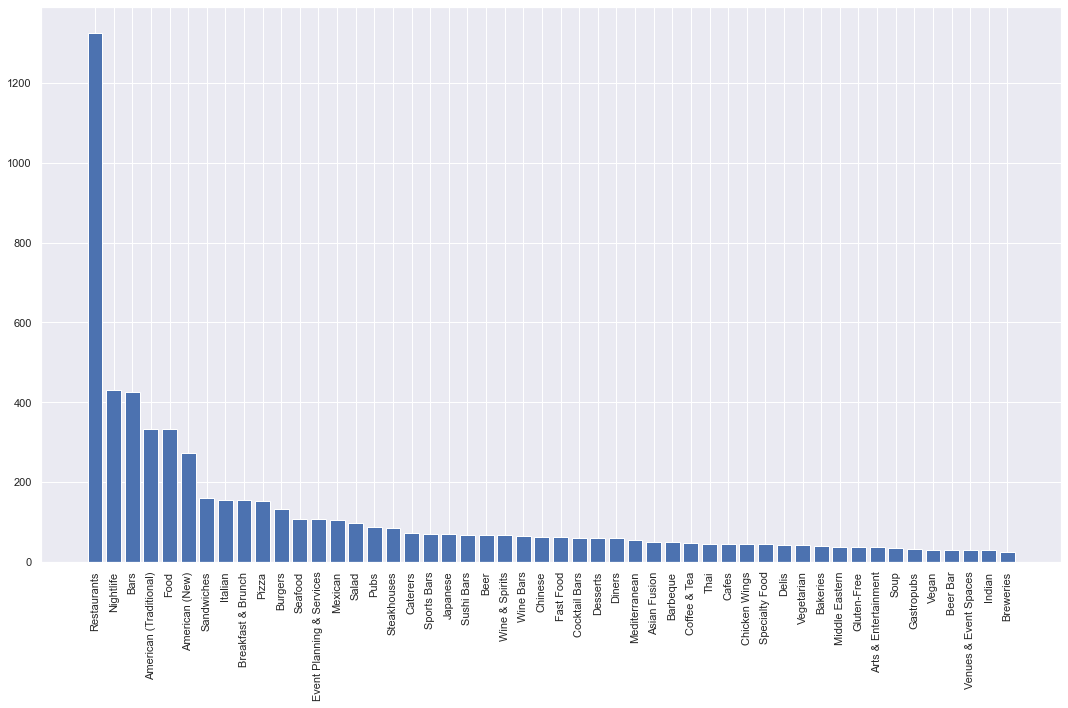

In [21]:
# Let's see the distribution of these categories.
indices = np.arange(len(dict_category_sorted[:50]))
word = []
frequency = []

for i in range(len(dict_category_sorted[:50])):
    word.append(dict_category_sorted[i][0])
    frequency.append(dict_category_sorted[i][1])
plt.figure(figsize=(15,10))
plt.bar(indices, frequency, color='b')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

### Text processing of the reviews

In [22]:
imp_ohio_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sep_categories,lst_stars,count_vect,tfidf_vect,values_cnt,values_tfidf
0,eE3ekstCj5dNcBJVsbOJBw,V34qejxNsCbcgD8C0HVk-Q,VH2BjFjc9usDquDgoHhptA,4.0,2,0,2,How exciting to have another great Barrio loca...,2015-02-11 03:05:31,"[Restaurants, Breakfast & Brunch, Mexican, Nig...",[4.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,9RIlb-Awn4B4Cdv7hfL9Hg,sxEzazybwfF86Mv8Dm3tgw,VH2BjFjc9usDquDgoHhptA,4.0,1,0,0,"Fun, fun place! It's just the perfect food-wi...",2016-12-04 14:15:43,"[Restaurants, Breakfast & Brunch, Mexican, Nig...",[4.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,V18bxL_rnoPltBZhthORYA,v35r6tj4TjIsON7Z1xE4yA,VH2BjFjc9usDquDgoHhptA,4.0,0,0,0,So effing good. Super cheap too. Did the build...,2015-12-15 01:46:39,"[Restaurants, Breakfast & Brunch, Mexican, Nig...",[4.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,ee7s14ESTjHfhbXEAl1_yw,p0lnRfBorJW2HzkzoLyymQ,VH2BjFjc9usDquDgoHhptA,4.0,0,0,0,"Heading into Cleveland for the first time, we ...",2017-11-08 15:13:13,"[Restaurants, Breakfast & Brunch, Mexican, Nig...",[4.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,raOFF3dORMPZ81RI5zh1Wg,ILk5Y4wPNW-7y0_As-xI6A,VH2BjFjc9usDquDgoHhptA,4.0,4,0,1,Hot dogs are to Happy Dog as tacos are to Barr...,2015-02-10 03:53:51,"[Restaurants, Breakfast & Brunch, Mexican, Nig...",[4.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [23]:
import datetime

In [24]:
imp_ohio_reviews['date'][0]

'2015-02-11 03:05:31'

In [25]:
imp_ohio_reviews['date'] = imp_ohio_reviews['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [26]:
imp_ohio_reviews.drop(['useful','funny','cool'],axis=1,inplace=True)

In [27]:
# Let's clean the text

In [37]:
stopwords = set(stopwords.words('english'))
def preprocess(text):
    text = text.translate(string.punctuation)
    text = text.lower().split()    
    text = [w for w in text if not w in stopwords and len(w) > 0]    
    text = " ".join(text)
    
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)    
    return text

AttributeError: 'set' object has no attribute 'words'

In [36]:
imp_ohio_reviews['clean_text'] = imp_ohio_reviews['text'].apply(preprocess)

In [38]:
for i in range(2):
    print(imp_ohio_reviews.iloc[i]['text'])
    print('\n')
    print(imp_ohio_reviews.iloc[i]['clean_text'])
    print('-'*100)

How exciting to have another great Barrio location. It's large and bright and the service was quick. Same cheap prices and great tacos as we're used to from the Tremont and Lakewood locations.


exciting another great barrio location large bright service quick cheap prices great tacos we are used tremont lakewood locations 
----------------------------------------------------------------------------------------------------
Fun, fun place!  It's just the perfect food-with-drinks kind of place.  For $3 each, you make your own tacos. (Ordering off of a check list, choosing your own shell, protein, toppings, etc).  Totally vegan-friendly too.  I ordered two corn/hard shells, one with spicy tofu and the other with black beans, both with a jicama slaw and salsas.  You can also order a small side of rice which comes in the perfect-sized four ounce container to compliment the tacos.
So $7 got me two tacos and rice which was more than enough for me.  The food was surprisingly good.  Everything 

### One hot encoding over the dishes!

### There are multiple reviews per user as well as per restaurant

In [41]:
user_rev = imp_ohio_reviews.groupby('user_id').agg({'clean_text': ' '.join})
rest_rev = imp_ohio_reviews.groupby('business_id').agg({'clean_text': ' '.join})

In [42]:
imp_ohio_reviews.groupby('business_id').describe()

stars                                   
                       count mean  std  min  25%  50%  75%  max
business_id                                                    
--S62v0QgkqQaVUhFnNHrw   3.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
-GOsHrWPC0meDRgkCEgC8w  41.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
-MC7EFxTsyKMKB3zeP_FIQ  10.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
-OD5KnGJk4Ld8IVa2jAuFA  16.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
-_DxZ8gKU50sfuZEu4ypKg  69.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
...                      ...  ...  ...  ...  ...  ...  ...  ...
zm8u9z2KCwEkNiCD59UQ3Q   9.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
ztQH2Q99E3D-iSdfImqjcQ  13.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
zutT311xSgH_Gbdza_jc1w  14.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
zydbdBR6-CM8UZ6WkW1DWA   8.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
zzSYBWuv_fXGtSgsO-6_1g  77.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0

[689 rows x 8 columns]

In [43]:
user_rev.head()

,clean_text
user_id,
--J8UruLD_xvVuI1lMAxpA,lived cleveland often took customers favorite ...
--amZ_cR9Zgu4B1RrAHJyA,great location pho row staff pretty cool frien...
--cO5bedOWodnt8UgamQNA,service great ! chips alright just tortilla ch...
-0MXmdIs75oSWmp8XlQKIw,place pretty decent burger kind way way chicag...
-0S_XaK3Q_Mesal2Unta2w,hole wall place but food pretty good pho crepe...


In [44]:
tfidf_user = TfidfVectorizer(max_features=5000)
tfidf_rest = TfidfVectorizer(max_features=5000)

In [45]:
trans_user_rev = tfidf_user.fit_transform(user_rev['clean_text'])

In [46]:
trans_rest_rev = tfidf_rest.fit_transform(rest_rev['clean_text'])

### I could use some kind of similarity measure!

In [47]:
trans_rest_rev[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

## SpaCy word2vec

Make a function to check the similarities between two text reviews

In [48]:
def check_similarities(str1,str2):
    doc1 = nlp_large(str1)
    doc2 = nlp_large(str2)
    return doc1.similarity(doc2)

### We can use this function to calculate the similarity between the reviews for user 1 and user2

In [49]:
# Similarity between user 1 and user 2
check_similarities(user_rev.iloc[0]['clean_text'],user_rev.iloc[500]['clean_text'])

0.9280858216188774

In [50]:
# Similarity between user 1 and user 2
check_similarities(rest_rev.iloc[0]['clean_text'],rest_rev.iloc[1]['clean_text'])

0.9575572142908965

##  VADER polarity scores 

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [52]:
sid = SentimentIntensityAnalyzer()

In [58]:
sid.polarity_scores(imp_ohio_reviews['clean_text'][0])

{'neg': 0.0, 'neu': 0.512, 'pos': 0.488, 'compound': 0.936}

In [60]:
imp_ohio_reviews.loc[0]['clean_text']

'exciting another great barrio location large bright service quick cheap prices great tacos we are used tremont lakewood locations '

In [65]:
imp_ohio_reviews['stars'].value_counts()

4.0    16784
3.0     2177
5.0      571
2.0      124
Name: stars, dtype: int64

In [67]:
len(imp_ohio_reviews)

19656

In [68]:
for i in range(1):
    item_star = imp_ohio_reviews['stars'][i]
    
    pol_dict = sid.polarity_scores(imp_ohio_reviews['clean_text'][i])
    if pol_dict['pos'] >= pol_dict['neg']:
        item_pol = pol_dict['pos']
    else:
        item_pol = pol_dict['neg']
    

    print(f"The star rating is {item_star} \nThe vader dict score is {pol_dict} \nThe polarity score is {item_pol}")
    print(imp_ohio_reviews['clean_text'][i])
    print('\n')

The star rating is 4.0 
The vader dict score is {'neg': 0.0, 'neu': 0.512, 'pos': 0.488, 'compound': 0.936} 
The polarity score is 0.488
exciting another great barrio location large bright service quick cheap prices great tacos we are used tremont lakewood locations 




In [81]:
# make a function
def extract_polarity(clean_text):
    pol_dict = sid.polarity_scores(clean_text)
    if pol_dict['pos'] >= pol_dict['neg']:
        item_pol = pol_dict['pos']
        return item_pol
    else:
        item_pol = -pol_dict['neg']
        return item_pol
    

In [85]:
extract_polarity('exciting another horrible barrio location not large bright service bad cheap prices great')

-0.381

In [55]:
for i in range(100):
    item_star = imp_ohio_reviews['stars'][i]
    if item_star <= 2.0:
        pol_dict = sid.polarity_scores(imp_ohio_reviews['clean_text'][i])
        if pol_dict['pos'] >= pol_dict['neg']:
            item_pol = pol_dict['compound']
        elif pol_dict['pos'] + 0.02 < pol_dict['neg']:
            item_pol = pol_dict['compound']
        else:
            item_pol = -pol_dict['compound']

        print(f"The star rating is {item_star} \nThe compound score is {pol_dict} \nThe polarity score in {item_pol}")
        print(imp_ohio_reviews['clean_text'][i])
        print('\n')

## Vader is not able to capture the negative sentiments!

## Latent Dirichlet Allocation(LDA) 

In [102]:
cv = CountVectorizer(min_df=0.1,max_df=0.9,stop_words=stopwords,)

In [103]:
matrix = cv.fit_transform(imp_ohio_reviews['text'])

In [104]:
matrix

<109248x65 sparse matrix of type '<class 'numpy.longlong'>'
	with 1201673 stored elements in Compressed Sparse Row format>

In [94]:
from sklearn.decomposition import LatentDirichletAllocation

In [105]:
LDA = LatentDirichletAllocation(n_components=5,random_state=42)

In [106]:
LDA.fit(matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [108]:
LDA.components_[0]

array([1.08637490e+04, 1.28961075e+01, 1.51446325e+03, 1.33589934e+03,
       9.18723704e+02, 3.22918025e+03, 9.21615274e+01, 1.01995673e+01,
       2.34514419e+03, 1.99098020e+03, 3.18407224e+03, 1.20820581e+04,
       2.42675472e+04, 3.61457978e+02, 1.19051714e+03, 2.22499104e+03,
       4.59356239e+03, 6.66922365e+03, 2.92663026e+03, 8.26826874e+02,
       9.39538589e+02, 1.69222890e+03, 1.06222046e+02, 9.63888032e+02,
       9.63639960e+03, 5.82503573e+03, 1.33538152e+03, 2.49460780e+03,
       1.55355364e+03, 3.52482571e+04, 6.60373315e+03, 6.07659023e+03,
       9.44176582e+03, 8.85093284e+03, 6.88796703e+02, 2.56200783e+03,
       7.59759688e+02, 3.92394433e+03, 3.86631934e+03, 3.58890692e+03,
       1.54133784e+02, 9.26813408e+03, 9.43273545e+02, 2.58357928e+03,
       2.03927296e+03, 1.02997436e+04, 2.44870608e+02, 6.29211225e+03,
       7.57818480e+03, 1.25065714e+04, 3.13885694e+03, 1.65114678e+04,
       5.14944951e+03, 7.72711912e+03, 7.77290521e+01, 1.20822046e+02,
      

In [109]:
cv.get_feature_names()

['also',
 'always',
 'amazing',
 'area',
 'atmosphere',
 'back',
 'bar',
 'beer',
 'best',
 'better',
 'came',
 'cheese',
 'chicken',
 'cleveland',
 'come',
 'could',
 'definitely',
 'delicious',
 'dinner',
 'eat',
 'even',
 'everything',
 'experience',
 'first',
 'food',
 'fresh',
 'friendly',
 'get',
 'go',
 'good',
 'got',
 'great',
 'like',
 'little',
 'love',
 'made',
 'make',
 'meal',
 'menu',
 'much',
 'never',
 'nice',
 'night',
 'one',
 'order',
 'ordered',
 'people',
 'place',
 'pretty',
 'really',
 'restaurant',
 'sauce',
 'service',
 'side',
 'staff',
 'table',
 'think',
 'time',
 'try',
 'two',
 'us',
 'wait',
 'well',
 'went',
 'would']

In [110]:
single_topic = LDA.components_[0]

In [113]:
for index in single_topic.argsort()[:10]:
    print(cv.get_feature_names()[index])
    

beer
always
us
wait
staff
bar
experience
table
never
people


In [114]:
for topic in LDA.components_:
    for index in topic.argsort()[:10]:
        print(cv.get_feature_names()[index])
    print('-'*50)

beer
always
us
wait
staff
bar
experience
table
never
people
--------------------------------------------------
chicken
sauce
always
ordered
came
order
fresh
table
us
got
--------------------------------------------------
chicken
always
beer
love
go
sauce
eat
cheese
never
pretty
--------------------------------------------------
beer
came
ordered
got
us
went
bar
chicken
atmosphere
table
--------------------------------------------------
beer
always
atmosphere
chicken
staff
friendly
fresh
love
great
delicious
--------------------------------------------------


### All the reviews are food and restaurant related so, LDA is not able to capture the individual topics!